# CAPM 


$$
    r_M \sim \mathcal{N}(\alpha + \beta r_A, \varepsilon) \ \forall A
$$

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
%config InlineBackend.figure_format = "retina"

In [3]:
port_path = "Prueba.xlsx"
market = pd.read_excel(port_path, index_col=0)

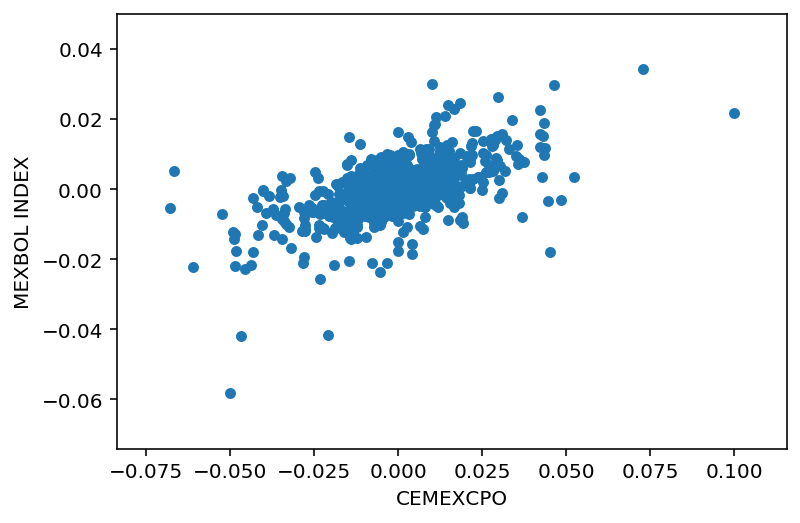

In [4]:
rets = market.pct_change().dropna(axis=0)
rets.columns = [col.replace(" MF Equity", "") for col in rets.columns]
rets.plot.scatter(x="CEMEXCPO", y="MEXBOL INDEX")

$$
    {\bf w} = (\Phi^T\Phi)^{-1} \Phi{\bf t}
$$

In [5]:
N = len(rets)
N

672

In [6]:
Phi = np.c_[np.ones(N), np.ones(N), rets[["KIMBERA", "CEMEXCPO"]].values]
#np.linalg.inv(Phi.T @ Phi)

In [7]:
I = np.concatenate([np.identity(2)] * 2, axis=1)
I = np.concatenate([I] * 2, axis=0)

I

array([[1., 0., 1., 0.],
       [0., 1., 0., 1.],
       [1., 0., 1., 0.],
       [0., 1., 0., 1.]])

In [8]:
Phi = rets.iloc[:, :-1].values
t = rets.iloc[:, [-1]]
N, M = Phi.shape

I = np.concatenate([np.identity(M)] * 2, axis=1)
I = np.concatenate([I] * 2, axis=0)

In [9]:
P = np.ones((N, M))
P = np.c_[P, Phi]

In [10]:
W = np.linalg.inv((P.T @ P) * I) @ P.T @ t
W["security"]  = np.concatenate([rets.columns[:-1]] * 2)
W["param"] = ["alpha"] * M + ["beta"] * M
B = W.pivot_table(index="security", columns="param", values="MEXBOL INDEX")

In [11]:
B.sort_values("beta", ascending=False)

param,alpha,beta
security,,
FEMSAUBD,-0.000168,0.460590
AMXL,-0.000176,0.432599
KOFUBL,0.000011,0.348460
GFNORTEO,-0.000170,0.305996
ASURB,-0.000141,0.300818
WALMEX*,-0.000256,0.294421
BBAJIOO,-0.000183,0.289782
AC*,-0.000002,0.288872
GAPB,-0.000232,0.287803


In [12]:
alpha, beta = B.loc["ASURB"]

In [13]:
from ipywidgets import interact

@interact(security=rets.columns[:-1])
def plot_capm(security):
    rets.plot.scatter(x=security, y="MEXBOL INDEX")
    sec = rets[security]
    x = np.linspace(sec.min(), sec.max(), 100)
    alpha, beta = B.loc[security]
    plt.title(rf"$\alpha={alpha:0.3f}$ | $\beta={beta:0.3f}$")
    plt.plot(x, alpha + beta * x, c="tab:orange", linewidth=4)

interactive(children=(Dropdown(description='security', options=('KIMBERA', 'GAPB', 'CEMEXCPO', 'ASURB', 'GFNOR…

## Optimización de los pesos

In [14]:
port_path = "PreciosPortf.xlsx"
data = pd.read_excel(port_path, index_col=0)

rend = data.pct_change().dropna()

rend_ports = rend.mean() * 252
rend_ports

ASURB MF Equity       0.123539
GFNORTEO MF Equity    0.078811
PE&OLES* MF Equity    0.111053
WALMEX* MF Equity     0.082426
IENOVA* MF Equity     0.078997
dtype: float64

In [15]:
rend.cov()

,ASURB MF Equity,GFNORTEO MF Equity,PE&OLES* MF Equity,WALMEX* MF Equity,IENOVA* MF Equity
ASURB MF Equity,0.000224,0.000086,0.000061,0.000036,0.000044
GFNORTEO MF Equity,0.000086,0.000341,0.000094,0.000082,0.000082
PE&OLES* MF Equity,0.000061,0.000094,0.000548,0.000041,0.000045
WALMEX* MF Equity,0.000036,0.000082,0.000041,0.000215,0.000043
IENOVA* MF Equity,0.000044,0.000082,0.000045,0.000043,0.000226


In [16]:
weights = np.random.random(5)
weights /= sum(weights)
weights

array([0.401102  , 0.16223739, 0.35290866, 0.0490129 , 0.03473904])

In [17]:
sum(weights)

1.0000000000000002

In [18]:
# rendimiento esperado (anualizado) de portafolio
(rend.mean() * weights).sum() * 252

0.10831389621963369

In [19]:
E_p = (rend.mean() @ weights) * 252
S_p = np.sqrt(weights.T @ (rend.cov() * 252) @ weights)

In [20]:
E_p, S_p

(0.1083138962196337, 0.20122905494330184)

In [21]:
def port_rend(weights, r):
    E_p = (r.mean() @ weights) * 252
    return E_p

def port_vol(weights, r):
    S_p = np.sqrt(weights.T @ (r.cov() * 252) @ weights)
    return S_p

In [22]:
port_rend(weights, rend), port_vol(weights, rend)

(0.1083138962196337, 0.20122905494330184)

In [23]:
weights_sim = np.random.random((5000, 5))
weights_sim = weights_sim / weights_sim.sum(axis=1, keepdims=True)

rend_sim = np.apply_along_axis(port_rend, 1, weights_sim, r=rend)
vol_sim = np.apply_along_axis(port_vol, 1, weights_sim, r=rend)

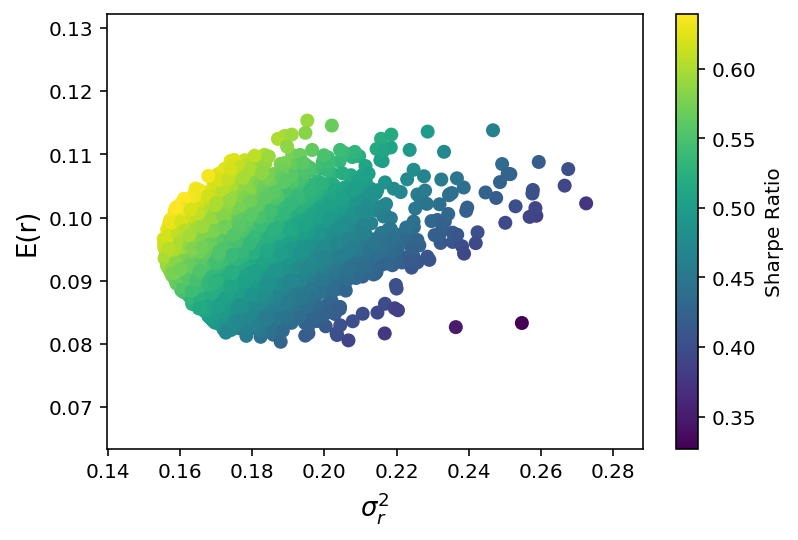

In [24]:
sharpe_ratio = rend_sim / vol_sim
plt.scatter(vol_sim, rend_sim, c=sharpe_ratio)
plt.colorbar(label="Sharpe Ratio")
plt.xlabel(r"$\sigma^2_r$", fontsize=13)
plt.ylabel("E(r)", fontsize=13);

### Creando la frontera eficiente

$$
\begin{aligned}
    \min \ &{\bf w}^T\Sigma {\bf w} \\
    s.t.\ & {\bf w}^T {\bf 1} = 1 \\
\end{aligned}
$$

In [25]:
from scipy.optimize import minimize

In [26]:
N, M = rend.shape
w0  = np.random.randn(M)

def sum_weights(weights):
    return weights.sum() - 1 # == 0

constraints = [
    {"type": "eq", "fun": sum_weights}
]

port0 = minimize(port_vol, w0, constraints=constraints, args=rend)
port0

     fun: 0.15516232059135157
     jac: array([0.15537346, 0.15504104, 0.15577777, 0.15494919, 0.15500051])
 message: 'Optimization terminated successfully.'
    nfev: 64
     nit: 9
    njev: 9
  status: 0
 success: True
       x: array([0.28253277, 0.04385114, 0.0906239 , 0.30737685, 0.27561535])

In [27]:
wp0 = port0.x
port_rend(wp0, rend), port_vol(wp0, rend)

(0.09553252117575126, 0.15516232059135157)

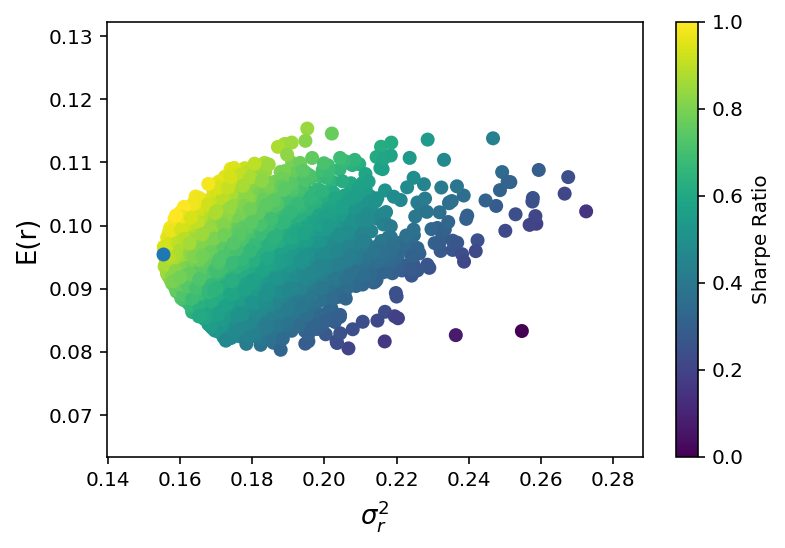

In [28]:
sharpe_ratio = rend_sim / vol_sim
plt.scatter(vol_sim, rend_sim, c=sharpe_ratio)
plt.scatter(port_vol(wp0, rend), port_rend(wp0, rend))
plt.colorbar(label="Sharpe Ratio")
plt.xlabel(r"$\sigma^2_r$", fontsize=13)
plt.ylabel("E(r)", fontsize=13);

### Optimización sujeta a un rendimiento esperado+RESTRICCION PROPIA


$$
\begin{aligned}
    \min \ &{\bf w}^T\Sigma {\bf w} \\
    s.t.\ & {\bf w}^T {\bf 1} = 0.9 \\
    &{\bf w}^T R_p = E/n
\end{aligned}
$$

In [77]:
N, M = rend.shape
w0  = np.random.randn(M)

def sum_weights(weights):
    return weights.sum() -.9 # == 0

def rend_esperado(w, E):
    return port_rend(w, rend) - E/len(w) # == 0

def vol_esperado(w, S):
    return port_vol(w, rend) - S # == 0

e0 = 0.1
s0=.2
constraints = [
    {"type": "eq", "fun": sum_weights},
    {"type": "eq", "fun": lambda w: rend_esperado(w, e0)}
    #{"type": "eq", "fun": lambda w: vol_esperado(w, s0)}
]

port1 = minimize(port_vol, w0, constraints=constraints, args=rend)
port1

     fun: 0.3894242016842189
     jac: array([-0.08873851,  0.14165924, -0.02449141,  0.12280674,  0.14039672])
 message: 'Optimization terminated successfully.'
    nfev: 64
     nit: 9
    njev: 9
  status: 0
 success: True
       x: array([-1.07309419,  0.58703938, -0.17438634,  0.6999397 ,  0.86050146])

In [78]:
wp1 = port1.x
port_rend(wp1, rend), port_vol(wp1, rend)

(0.02000000000309896, 0.3894242016842189)

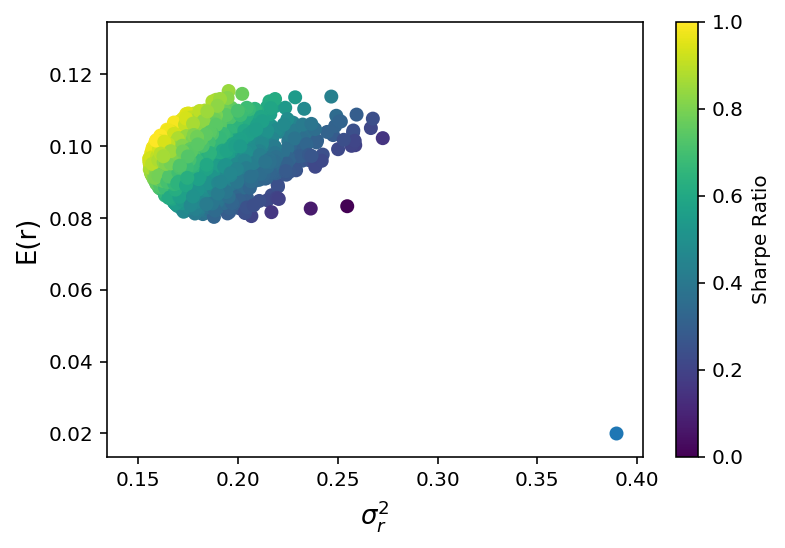

In [79]:
sharpe_ratio = rend_sim / vol_sim
plt.scatter(vol_sim, rend_sim, c=sharpe_ratio)
plt.scatter(port_vol(wp1, rend), port_rend(wp1, rend))
plt.colorbar(label="Sharpe Ratio")
plt.xlabel(r"$\sigma^2_r$", fontsize=13)
plt.ylabel("E(r)", fontsize=13);

In [80]:
#rend_maxs = np.linspace()
#vol_ports

In [81]:
r_min = port_rend(wp0, rend)
r_max = rend_ports.max()
#v_min = port_vol(wp0, rend)
#v_max = rend.std()*252

rend_max = np.linspace(r_min, r_max)
#vol_max = np.linspace(v_min, v_max)

In [82]:
pesos_optimos = []
for e in rend_max:
    constraints = [
        {"type": "eq", "fun": sum_weights},
        {"type": "eq", "fun": lambda w: rend_esperado(w,e)}
        #{"type": "eq", "fun": lambda w: vol_esperado(w, s)}
    ]

    port1 = minimize(port_vol, w0, constraints=constraints, args=rend)
    w_opt = port1.x
    pesos_optimos.append(w_opt)

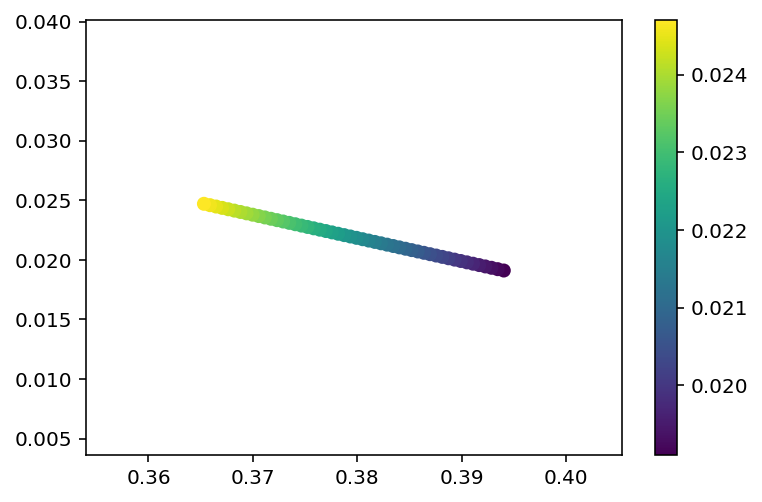

In [83]:
r_opt = []
v_opt = []
for w in pesos_optimos:
    r_opt.append(port_rend(w, rend))
    v_opt.append(port_vol(w, rend))

r_opt = np.array(r_opt)
v_opt = np.array(v_opt)

plt.scatter(v_opt, r_opt, c=r_opt)
plt.colorbar()